# K Nearest Neighbors

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

**Training Algorithm:**
1. Store all the data

**Prediction Algorithm:**
1. Calculate the distance from x to all points in your data
2. Sort the points in your data by increasing distance from x
3. Predict the majority label of the 'k' closest points

**Pros**
- Very simple
- Training is trivial
- Works with any number of classes
- Easy to add more data
- Few parameters: K and Distance Metric

**Cons**
- High Prediction Cost (worse for large datasets)
- Not good with high dimensional data
- Categorial Features don't work well

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import time
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN, SMOTENC
from imblearn.combine import SMOTETomek, SMOTEENN 
import matplotlib.pyplot as plt
from numpy import where

## Read the data from csv

In [2]:
df_train = pd.read_csv('../data/df_train.csv')
df_test = pd.read_csv('../data/df_test.csv')

X_train = df_train.drop('kill', axis=1)
y_train = df_train['kill']
X_test = df_test.drop(['kill'], axis=1)
y_test = df_test['kill']

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

Time to standardize the variables.

**Use StandardScaler from Scikit Learn and create a StandardScaler() object called scaler.**

In [3]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [4]:
scaler.fit(X_train)

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [5]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Using KNN

**Use KNeighborsClassifier from scikit learn.**

Remember that we are trying to come up with a model to predict whether it kill is True or False. We'll start with k=1.

**Create a KNN model instance with n_neighbors=1**

In [6]:
model = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [7]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [8]:
predictions = model.predict(X_test)

**Create a confusion matrix and classification report.**

In [9]:
print(confusion_matrix(y_test, predictions))

[[18440  1781]
 [ 1819  1001]]


Macro average and weighted average meaning in classification_report:
#### https://datascience.stackexchange.com/questions/65839/macro-average-and-weighted-average-meaning-in-classification-report

In [10]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     20221
           1       0.36      0.35      0.36      2820

    accuracy                           0.84     23041
   macro avg       0.64      0.63      0.63     23041
weighted avg       0.84      0.84      0.84     23041



In [11]:
def fit_and_print(model, X_train, y_train):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
    print("Classification Report: \n", classification_report(y_test, y_pred))  
    print("Accuracy: ", round(accuracy_score(y_test, y_pred),3))
    print("Precision:", round(precision_score(y_test, y_pred),3))
    print("Recall:", round(recall_score(y_test, y_pred),3))
    print("f1: ", round(f1_score(y_test, y_pred),3))

In [12]:
fit_and_print(model, X_train, y_train)

Confusion Matrix: 
 [[18440  1781]
 [ 1819  1001]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     20221
           1       0.36      0.35      0.36      2820

    accuracy                           0.84     23041
   macro avg       0.64      0.63      0.63     23041
weighted avg       0.84      0.84      0.84     23041

Accuracy:  0.844
Precision: 0.36
Recall: 0.355
f1:  0.357


### Choosing a K Value
One way to choose the k value is using the **Elbow Method** to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [13]:
error_rate = []
num = 50

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.20,random_state=101, stratify=y_train)

# It will take some time
for i in range(1,num):
    knn_model = KNeighborsClassifier(n_neighbors=i, n_jobs=-1 )
    knn_model.fit(X_train_new,y_train_new)
    knn_prediction_i = knn_model.predict(X_val)
    error_rate.append(np.mean(knn_prediction_i != y_val))

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

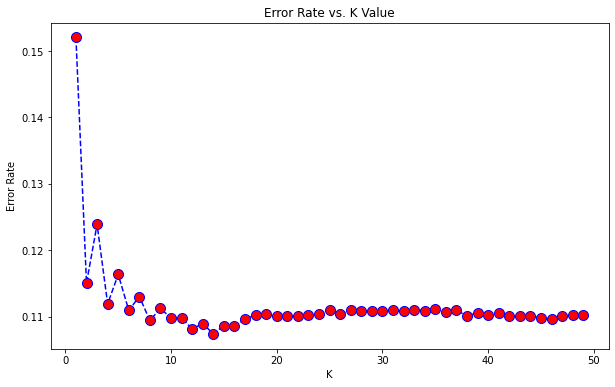

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,num),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Retrain with new K Value
Let's retrain the model with the best k value to minimize the error and check the classification report!

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [15]:
# NOW WITH K=14
knn_model = KNeighborsClassifier(n_neighbors=14)

knn_model.fit(X_train,y_train)
knn_predictions = knn_model.predict(X_test)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_test, knn_predictions))
print('\n')
print(classification_report(y_test, knn_predictions))
fit_and_print(knn_model, X_train, y_train)

WITH K=14


[[19889   332]
 [ 2246   574]]


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     20221
           1       0.63      0.20      0.31      2820

    accuracy                           0.89     23041
   macro avg       0.77      0.59      0.62     23041
weighted avg       0.87      0.89      0.86     23041

Confusion Matrix: 
 [[19889   332]
 [ 2246   574]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     20221
           1       0.63      0.20      0.31      2820

    accuracy                           0.89     23041
   macro avg       0.77      0.59      0.62     23041
weighted avg       0.87      0.89      0.86     23041

Accuracy:  0.888
Precision: 0.634
Recall: 0.204
f1:  0.308


### Gridsearch

Another way to find the optimal k value is using grid search

In [16]:
# Create the parameter grid based on the results of random search 
param_grid = {'n_neighbors': np.arange(1,51)}
# Create a based model
knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             verbose=2)

In [17]:
grid_search.best_params_

{'n_neighbors': 12}

In [18]:
best_grid = grid_search.best_estimator_

In [30]:
fit_and_print(best_grid, X_train, y_train)

Confusion Matrix: 
 [[19889   332]
 [ 2233   587]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     20221
           1       0.64      0.21      0.31      2820

    accuracy                           0.89     23041
   macro avg       0.77      0.60      0.63     23041
weighted avg       0.87      0.89      0.86     23041

Accuracy:  0.889
Precision: 0.639
Recall: 0.208
f1:  0.314


In [31]:
def calculate_pred_and_inf_time(best_grid, X_test):
    # get the start time
    st_wall_inf = time.time()

    # Generate generalization metrics
    grid_predictions = best_grid.predict(X_test)

    # get the end time
    et_wall_inf = time.time()

    # get execution time
    wall_time_inf = et_wall_inf - st_wall_inf
    print(f'Inference Time: {1000*wall_time_inf:.3f} miliseconds')

calculate_pred_and_inf_time(best_grid, X_test)

Inference Time: 3903.085 miliseconds


## Resampling

### SMOTE

In [26]:
# Oversample and plot imbalanced dataset with SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)
# transform the dataset
oversample = SMOTE(random_state=42)
X_train_rel, y_train_rel = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train_rel)
print(counter)

fit_and_print(best_grid, X_train_rel, y_train_rel)

calculate_pred_and_inf_time(best_grid, X_test)

Counter({0: 114988, 1: 15577})
Counter({0: 114988, 1: 114988})
Confusion Matrix: 
 [[15672  4549]
 [  908  1912]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.78      0.85     20221
           1       0.30      0.68      0.41      2820

    accuracy                           0.76     23041
   macro avg       0.62      0.73      0.63     23041
weighted avg       0.87      0.76      0.80     23041

Accuracy:  0.763
Precision: 0.296
Recall: 0.678
f1:  0.412
Inference Time: 5194.439 miliseconds


### ADASYN

In [27]:
# Oversample and plot imbalanced dataset with ADASYN

# summarize class distribution
counter = Counter(y_train)
print(counter)
# transform the dataset
oversample = ADASYN(random_state=42)
X_train_rel, y_train_rel = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train_rel)
print(counter)

fit_and_print(best_grid, X_train_rel, y_train_rel)

calculate_pred_and_inf_time(best_grid, X_test)

Counter({0: 114988, 1: 15577})
Counter({1: 119427, 0: 114988})
Confusion Matrix: 
 [[14796  5425]
 [  788  2032]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.73      0.83     20221
           1       0.27      0.72      0.40      2820

    accuracy                           0.73     23041
   macro avg       0.61      0.73      0.61     23041
weighted avg       0.87      0.73      0.77     23041

Accuracy:  0.73
Precision: 0.272
Recall: 0.721
f1:  0.395
Inference Time: 4969.945 miliseconds


### SMOTE and TL

In [28]:
# Oversample and plot imbalanced dataset with SMOTE and TL

# summarize class distribution
counter = Counter(y_train)
print(counter)
# transform the dataset
oversample = SMOTETomek(random_state=42)
X_train_rel, y_train_rel = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train_rel)
print(counter)

fit_and_print(best_grid, X_train_rel, y_train_rel)

calculate_pred_and_inf_time(best_grid, X_test)

Counter({0: 114988, 1: 15577})
Counter({0: 111748, 1: 111748})
Confusion Matrix: 
 [[15643  4578]
 [  888  1932]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.77      0.85     20221
           1       0.30      0.69      0.41      2820

    accuracy                           0.76     23041
   macro avg       0.62      0.73      0.63     23041
weighted avg       0.87      0.76      0.80     23041

Accuracy:  0.763
Precision: 0.297
Recall: 0.685
f1:  0.414
Inference Time: 5090.069 miliseconds


### SMOTE and ENN

In [29]:
# Oversample and plot imbalanced dataset with SMOTE and ENN

# summarize class distribution
counter = Counter(y_train)
print(counter)
# transform the dataset
oversample = SMOTEENN(random_state=42)
X_train_rel, y_train_rel = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train_rel)
print(counter)

fit_and_print(best_grid, X_train_rel, y_train_rel)

calculate_pred_and_inf_time(best_grid, X_test)

Counter({0: 114988, 1: 15577})
Counter({1: 96382, 0: 81992})
Confusion Matrix: 
 [[14588  5633]
 [  705  2115]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     20221
           1       0.27      0.75      0.40      2820

    accuracy                           0.72     23041
   macro avg       0.61      0.74      0.61     23041
weighted avg       0.87      0.72      0.77     23041

Accuracy:  0.725
Precision: 0.273
Recall: 0.75
f1:  0.4
Inference Time: 4632.786 miliseconds
